In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
df = pd.read_csv(r'C:\Users\shivani\Downloads\spam_dataset.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN


In [4]:
df=df.drop(columns=['Unnamed: 2','Unnamed: 3'])
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df_labels=df['v1']
df_labels.head(5)

0     ham
1     ham
2    spam
3     ham
4     ham
Name: v1, dtype: object

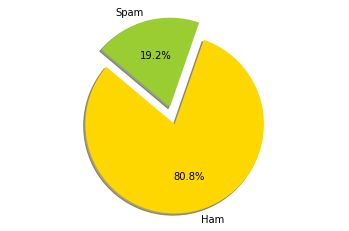

In [6]:
count_Class=pd.value_counts(df.v1, sort= True)

# Data to plot
labels = 'Ham', 'Spam'
sizes = [count_Class[0], count_Class[1]]
colors = ['gold', 'yellowgreen'] # 'lightcoral', 'lightskyblue'
explode = (0.1, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [7]:
trainset, testset, trainlabel, testlabel = train_test_split(df, df_labels, test_size=0.33, random_state=42)
print(trainset.shape[1])
print(testset.shape)
print("The Trainset consists of {} records and {} features".format(trainset.shape[0],trainset.shape[1]))
print("The Testset consists of {} records and {} features".format(testset.shape[0],trainset.shape[1]))

2
(33, 2)
The Trainset consists of 66 records and 2 features
The Testset consists of 33 records and 2 features


In [8]:
countvect= CountVectorizer(ngram_range=(2,2),)
x_counts = countvect.fit(trainset.v2)
#preparing for training set
x_train_df =countvect.transform(trainset.v2)
#preparing for test set
x_test_df = countvect.transform(testset.v2)


The accuracy of the model is 78.78787878787878%
[[24  0]
 [ 7  2]]


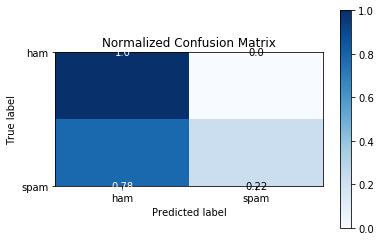

In [9]:
clf=MultinomialNB()
clf.fit(x_train_df,trainset.v1)
predicted_values = clf.predict(x_test_df)
predictions=dict()
acurracy = accuracy_score(testset.v1,predicted_values)
predictions['Naive Bayes']=acurracy*100
confusionmatrix = confusion_matrix(testset.v1,predicted_values)
print("The accuracy of the model is {}%".format(acurracy*100 ))
print(confusionmatrix)
skplt.metrics.plot_confusion_matrix(testset.v1,predicted_values, normalize=True)
plt.show()

['ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham'
 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham'
 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham']
The accuracy of the model is 72.72727272727273%
[[24  0]
 [ 9  0]]


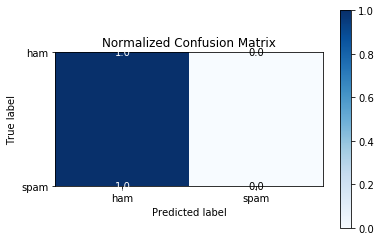

In [10]:
RF = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
RF.fit(x_train_df,trainset.v1)
predicted_values_RF = RF.predict(x_test_df)
print(predicted_values_RF)
acurracy_RF = accuracy_score(testset.v1,predicted_values_RF)
predictions['RandomForest']=acurracy_RF*100
print("The accuracy of the model is {}%".format(acurracy_RF*100 ))
#print(testset.v1)
confusion_matrix_RF = confusion_matrix(testset.v1,predicted_values_RF)
print(confusion_matrix_RF)
skplt.metrics.plot_confusion_matrix(testset.v1,predicted_values_RF, normalize=True)
plt.show()

['ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham'
 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham'
 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham']
The accuracy of the model is 72.72727272727273%
[[24  0]
 [ 9  0]]


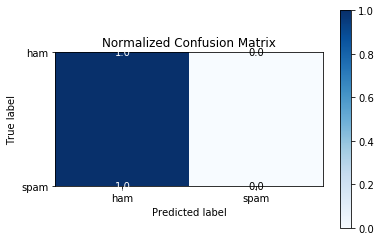

In [11]:
KNN=KNeighborsClassifier()
KNN.fit(x_train_df,trainset.v1)
predictedValues = KNN.predict(x_test_df)
print(predictedValues)
acurracy_KNN = accuracy_score(testset.v1,predictedValues)
predictions['KNN']=acurracy_KNN*100
print("The accuracy of the model is {}%".format(acurracy_KNN*100 ))
confusion_matrix_KNN = confusion_matrix(testset.v1,predictedValues)
print(confusion_matrix_KNN)
skplt.metrics.plot_confusion_matrix(testset.v1,predictedValues, normalize=True)
plt.show()

,Algorithms,Percentage
0,Naive Bayes,78.787879
1,RandomForest,72.727273
2,KNN,72.727273


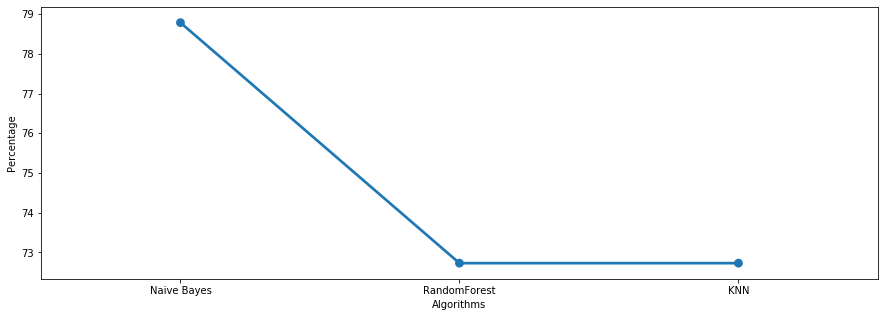

In [12]:
fig, (ax1) = plt.subplots(ncols=1, sharey=True,figsize=(15,5))
df=pd.DataFrame(list(predictions.items()),columns=['Algorithms','Percentage'])
display(df)
sns.pointplot(x="Algorithms", y="Percentage", data=df,ax=ax1)